In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression, SGDClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.utils import shuffle

In [2]:
https://drive.google.com/file/d/1Won6xkyYCcJLJ7eMpVt5VA_4P0tE1nb7/view?usp=sharing

SyntaxError: invalid decimal literal (<ipython-input-2-103dc6819567>, line 1)

In [2]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1Won6xkyYCcJLJ7eMpVt5VA_4P0tE1nb7

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From: https://drive.google.com/uc?id=1Won6xkyYCcJLJ7eMpVt5VA_4P0tE1nb7
To: /content/data_banknote_authentication.txt
100% 46.4k/46.4k [00:00<00:00, 90.7MB/s]


In [3]:
df = pd.read_csv('/content/data_banknote_authentication.txt')
df

,x1,x2,x3,x4,y
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
shuffled_data = shuffle(df)
shuffled_data.to_csv('created_data.csv', index=False)
print(shuffled_data)

            x1        x2        x3        x4  y
1093  0.744280  -3.77230   1.61310  1.575400  1
1030 -1.843900  -8.64750   7.67960 -0.666820  1
1206 -2.434900  -9.24970   8.99220 -0.500010  1
821  -4.017300  -8.31230  12.45470 -1.437500  1
246   1.647200   0.48213   4.74490  1.225000  0
...        ...       ...       ...       ... ..
235   2.046600   2.03000   2.17610 -0.083634  0
770   0.343400   0.12415  -0.28733  0.146540  1
680   3.446500   2.95080   1.02710  0.546100  0
726   0.040498   8.52340   1.44610 -3.930600  0
138   5.241800  10.53880  -4.11740 -4.279700  0

[1372 rows x 5 columns]


In [5]:
df1 = pd.read_csv('/content/created_data.csv')
df1

,x1,x2,x3,x4,y
0,0.744280,-3.77230,1.61310,1.575400,1
1,-1.843900,-8.64750,7.67960,-0.666820,1
2,-2.434900,-9.24970,8.99220,-0.500010,1
3,-4.017300,-8.31230,12.45470,-1.437500,1
4,1.647200,0.48213,4.74490,1.225000,0
...,...,...,...,...,...
1367,2.046600,2.03000,2.17610,-0.083634,0
1368,0.343400,0.12415,-0.28733,0.146540,1
1369,3.446500,2.95080,1.02710,0.546100,0
1370,0.040498,8.52340,1.44610,-3.930600,0


Logistic Regression (from Scratch)

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [7]:
def logistic_regression(x, w):
    y_hat = sigmoid(x @ w)
    return y_hat

Binary Cross Entropy (BCE)

In [8]:
def bce(y, y_hat):
    loss = -(np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))
    return loss

Gradient

In [9]:
def gradient(x, y, y_hat):
    grads = (x.T @ (y_hat - y)) / len(y)
    return grads

Gradient Descent

In [10]:
def gradient_descent(w, eta, grads):
    w -= eta*grads
    return w

Accuracy

In [11]:
def accuracy(y, y_hat):
    acc = np.sum(y == np.round(y_hat)) / len(y)
    return acc

train آموزش داده های

In [12]:
X = df1[['x1','x2','x3','x4']].values
y = df1[['y']].values
X, y

(array([[ 0.74428 , -3.7723  ,  1.6131  ,  1.5754  ],
        [-1.8439  , -8.6475  ,  7.6796  , -0.66682 ],
        [-2.4349  , -9.2497  ,  8.9922  , -0.50001 ],
        ...,
        [ 3.4465  ,  2.9508  ,  1.0271  ,  0.5461  ],
        [ 0.040498,  8.5234  ,  1.4461  , -3.9306  ],
        [ 5.2418  , 10.5388  , -4.1174  , -4.2797  ]]),
 array([[1],
        [1],
        [1],
        ...,
        [0],
        [0],
        [0]]))

تقسیم داده ها به دو دسته آموزش و ارزیابی

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1097, 4), (275, 4), (1097, 1), (275, 1))

In [24]:
y_hat = logistic_regression(x_train, np.random.randn(4, 1))
print(y_hat.shape)

(1097, 1)


In [25]:
x_train = np.hstack((np.ones((len(x_train), 1)), x_train))
x_train.shape

(1097, 5)

In [26]:
m = 4
w = np.random.randn(m+1, 1)
print(w.shape)

(5, 1)


In [27]:
eta = 0.01
n_epochs = 60000 #N

In [28]:
error_hist = []

for epoch in range(n_epochs):
    # predictions
    y_hat = logistic_regression(x_train, w)

    # loss
    e = bce(y_train, y_hat)
    error_hist.append(e)

    # gradients
    grads = gradient(x_train, y_train, y_hat)

    # gradient descent
    w = gradient_descent(w, eta, grads)

    if (epoch+1) %  1== 0:
        print(f'Epoch={epoch}, \t E={e:.4},\t w={w.T[0]}')

Streaming output truncated to the last 5000 lines.
Epoch=55000, 	 E=0.02351,	 w=[ 3.48978249 -3.54936611 -2.01516753 -2.44474373 -0.19067719]
Epoch=55001, 	 E=0.02351,	 w=[ 3.48979738 -3.54938442 -2.01517685 -2.44475582 -0.19067841]
Epoch=55002, 	 E=0.02351,	 w=[ 3.48981228 -3.54940272 -2.01518617 -2.44476791 -0.19067963]
Epoch=55003, 	 E=0.02351,	 w=[ 3.48982717 -3.54942103 -2.01519549 -2.44478    -0.19068085]
Epoch=55004, 	 E=0.02351,	 w=[ 3.48984206 -3.54943933 -2.01520481 -2.44479209 -0.19068207]
Epoch=55005, 	 E=0.02351,	 w=[ 3.48985695 -3.54945764 -2.01521413 -2.44480418 -0.1906833 ]
Epoch=55006, 	 E=0.02351,	 w=[ 3.48987184 -3.54947594 -2.01522345 -2.44481626 -0.19068452]
Epoch=55007, 	 E=0.02351,	 w=[ 3.48988673 -3.54949425 -2.01523277 -2.44482835 -0.19068574]
Epoch=55008, 	 E=0.02351,	 w=[ 3.48990162 -3.54951255 -2.01524209 -2.44484044 -0.19068696]
Epoch=55009, 	 E=0.0235,	 w=[ 3.48991652 -3.54953085 -2.01525141 -2.44485253 -0.19068818]
Epoch=55010, 	 E=0.0235,	 w=[ 3.48993141

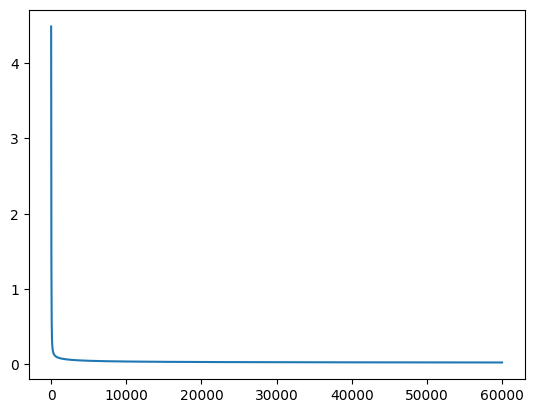

In [29]:
plt.plot(error_hist)

In [30]:
y_hat = logistic_regression(x_train, w)
accuracy(y_train, y_hat)

0.9881494986326345

In [31]:
x_test = np.hstack((np.ones((len(x_test), 1)), x_test))
y_hat = logistic_regression(x_test, w)
accuracy(y_test, y_hat)

0.9890909090909091